In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Preprocessing 

In [146]:
def preprocessing_data(file_path):
    df = pd.read_csv(file_path)

# zastępowanie spacji podłogą
    df.columns = df.columns.str.replace(" ","_")

# zastępowanie dużych liter małymi
    df.columns = df.columns.str.lower()

# podstawowe informacje
    print("Pierwsze kilka wierszy:")
    print(df.head())
    print("\nInformacje o DataFrame:")
    print(df.info())
    print("\nPodstawowe statystyki:")
    print(df.describe().T)

# sprawdzanie liczby brakujących wartości
    zero_count = df.isna().sum()
    print("\nLiczba brakujących wartości w każdej kolumnie:")
    print(zero_count)

# wyświetlanie czy zbiór jest zbalansowany za pomocą wykresu
    value_counts = df["status"].value_counts()
    print("Liczba wystąpień każdej unikalnej wartości w kolumnie 'Status':")
    print(value_counts)

# Usuwanie kolumny 'Country'
    df.drop(columns=['country'], inplace=True)
    
    if "status" in df.columns:
        plt.clf()
        ax = sns.countplot(x=df["status"])
        
        # Dodawanie wartości liczbowych wewnątrz prostokątów
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height / 2),
                        ha='center', va='center')

        plt.title('Zbiór danych')
        plt.show()

# konwersja kolumny 'Status' na wartości numeryczne za pomocą Label Encoding
    df["status"] = df["status"].map({"Developing": 0, "Developed": 1})

# Wypełnianie brakujących wartości średnią kolumny
    df.fillna(df.mean(), inplace=True)

    return df

In [147]:
file_path = "C:\\Users\\joann\\Desktop\\Dajana_ds\\repozytoria\\Life_Expectancy_Data\\Life Expectancy Data.csv"

Co zrobić w przypadku gdy w df jest dużo 0, usunąć je od razu w funkcji czy zamienić na średnią?

In [63]:
# usuwanie wierszy z brakującymi danymi
    #df.dropna(inplace=True)
    #print("\nPo usunięciu wierszy z brakującymi wartościami:")
    #print(df.info())

Status
Developing    2426
Developed      512
Name: count, dtype: int64

Pierwsze kilka wierszy:
       country  year      status  life_expectancy_  adult_mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles_  ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   polio  total_expenditure  diphtheria_  _hiv/aids         gd

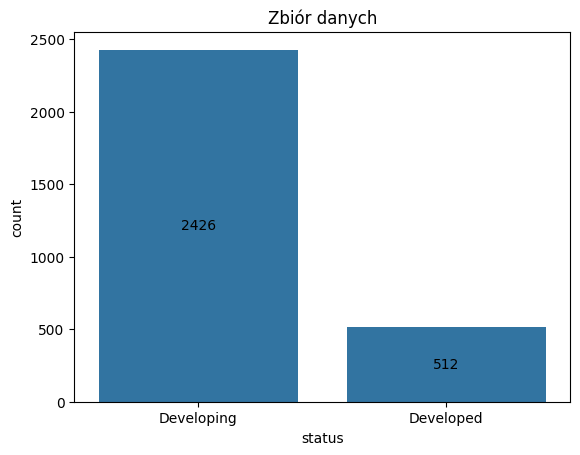

In [148]:
preprocessing_df = preprocessing_data(file_path)

In [149]:
preprocessing_df

,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Dzielenie na zbiór treningowy i testowy

In [152]:
def split_data(preprocessing_df, test_size=0.2, random_state=42):
    X = preprocessing_df.drop(columns=["status"], axis=1) 
    y = preprocessing_df["status"]
    X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, y_train, X_test, y_test

In [153]:
X_train, X_test, y_train, y_test = split_data(preprocessing_df)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2350, 20) (2350,)
(588, 20) (588,)


# Modelowanie

In [154]:
def train_model(X_train, y_train):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    return model

In [155]:
model = train_model(X_train, y_train)
model 

c:\Users\joann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# Metryki

In [156]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")
    return accuracy, cm, report

In [157]:
accuracy, cm, report = evaluate_model(model, X_test, y_test)

Accuracy: 0.8962585034013606
Confusion Matrix:
[[467  24]
 [ 37  60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       491
           1       0.71      0.62      0.66        97

    accuracy                           0.90       588
   macro avg       0.82      0.78      0.80       588
weighted avg       0.89      0.90      0.89       588

